In [14]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [3]:
import os
os.getcwd()
os.chdir('C:\\Users\\Alpesh\\OneDrive\\Documents\\Projects\\Fetal Health')

In [4]:
#Loading and beginning Preprocessing
data = pd.read_csv('fetal_health.csv')

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [13]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

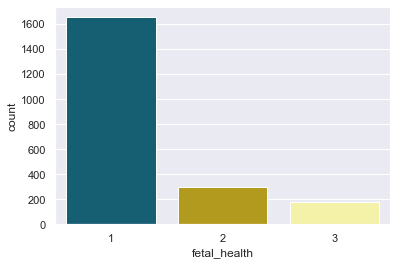

In [27]:
#Basic Analysis
#Target variable count plot
colours = ['#076780', '#caab05', '#fffe9c']
sns.set_theme(style="darkgrid")
sns.countplot(data=data,x="fetal_health", palette= colours)

In [34]:
pip install pandas-profiling


  Created wheel for phik: filename=phik-0.11.0-py3-none-any.whl size=599743 sha256=993407e3a352fce075aef0d5fc86589da4aa7f495ddf3625318512444f596d8f
  Stored in directory: c:\users\alpesh\appdata\local\pip\cache\wheels\15\cd\d8\d1a2da5bf20e6411649edb390d93887820168898a3659fd48d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=5ab81c56026d30113c567506f13491806b7645dae0f37ab315b2f6639431359a
  Stored in directory: c:\users\alpesh\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin


In [40]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

In [56]:
pip install dabl

  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572793 sha256=2528df7422fce9d50879a5a9d28936db6583e78d07bb19f5ed4223fa9f9e53e8
  Stored in directory: c:\users\alpesh\appdata\local\pip\cache\wheels\63\d2\62\c3ee6bbd1c1f0d7b7d9dbb96a4f5d59c35c08c70662d7695aa
Successfully built dabl



C:\Users\Alpesh\anaconda3\lib\site-packages\dabl\plot\supervised.py:538: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."
C:\Users\Alpesh\anaconda3\lib\site-packages\dabl\preprocessing.py:351: UserWarning: Discarding near-constant features: ['severe_decelerations']
  warn("Discarding near-constant features: {}".format(
C:\Users\Alpesh\anaconda3\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 3 outliers in column prolongued_decelerations.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Alpesh\anaconda3\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 6 outliers in column histogram_variance.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\Alpesh\anaconda3\lib\site-packages\dabl\plot\utils.py:629: UserWarning: Dropped 2 outliers in column mean_value_of_short_term_variability.
  warn("Dropped {} outlier

Target looks like classification
Linear Discriminant Analysis training set score: 0.739


C:\Users\Alpesh\anaconda3\lib\site-packages\dabl\plot\utils.py:371: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


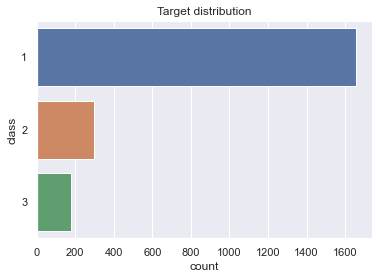

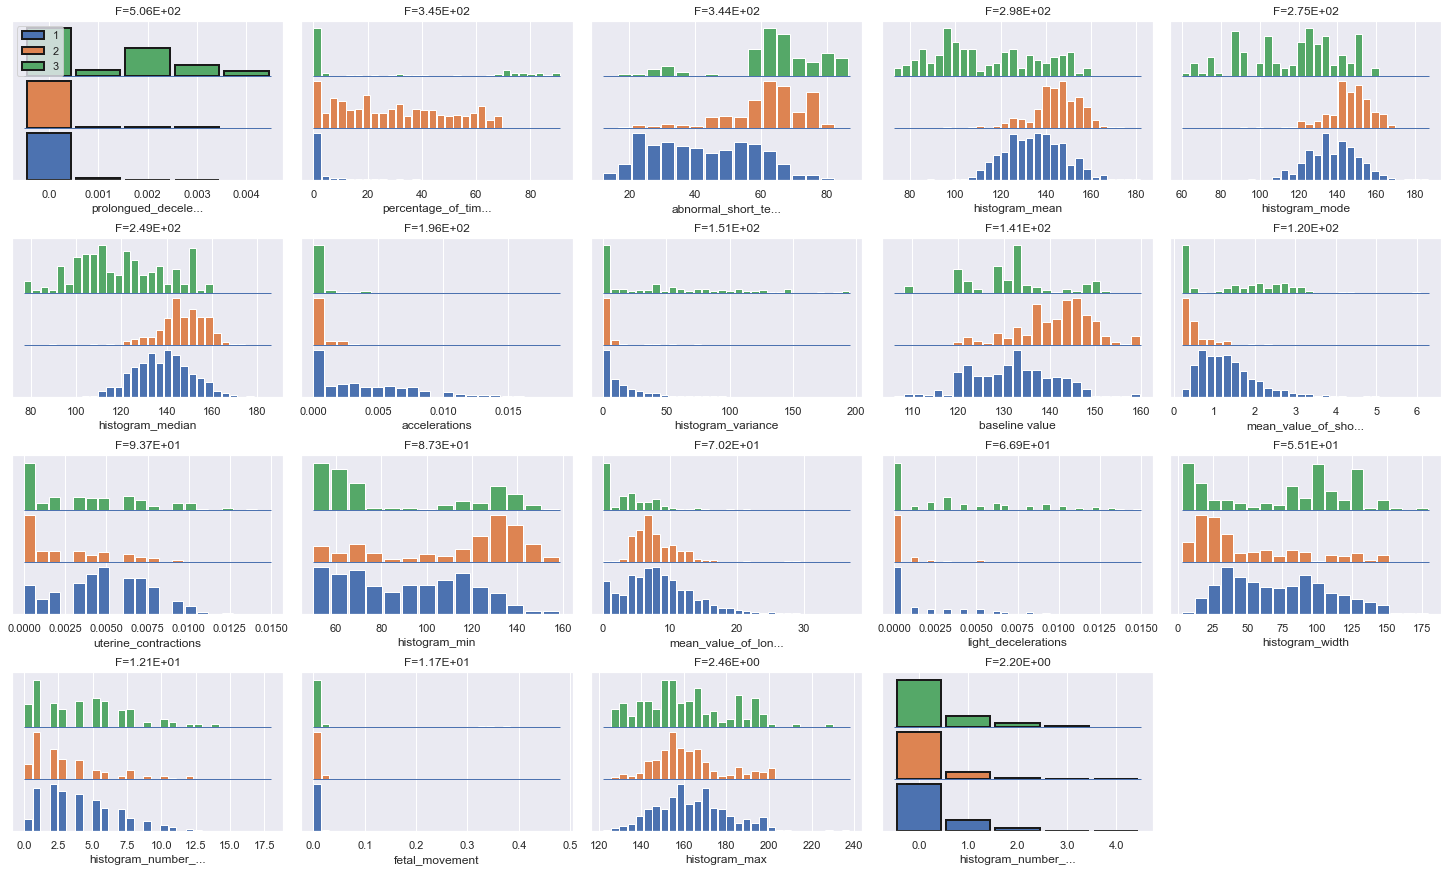

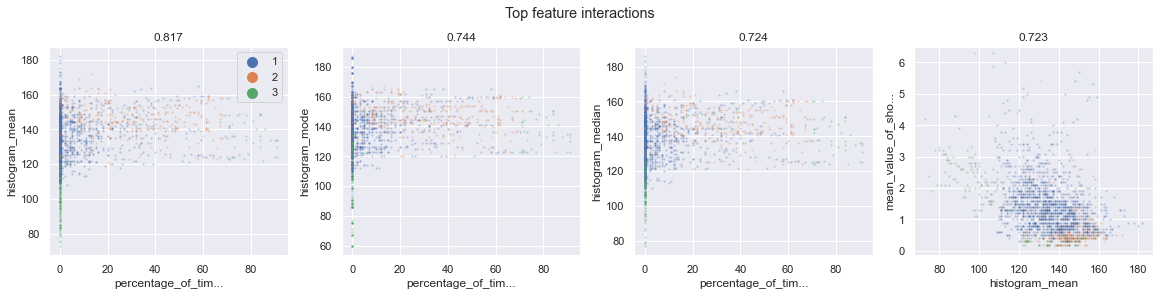

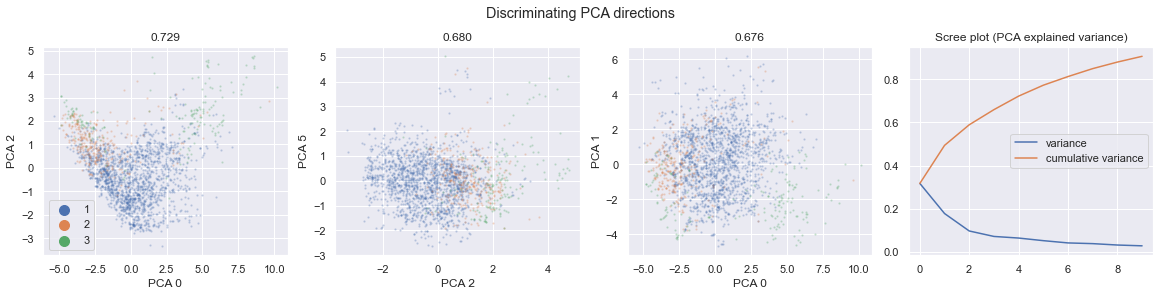

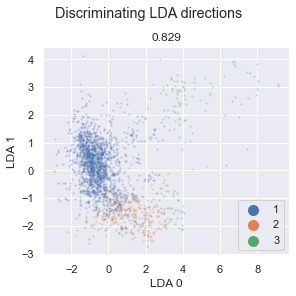

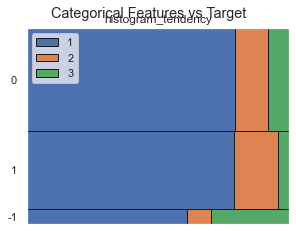

In [59]:
dabl.plot(data,'fetal_health')

In [32]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()

correlation_numeric = numeric_corr['fetal_health'].sort_values(ascending=False).head(10).to_frame()

numeric_table = correlation_numeric.style.background_gradient(cmap='GnBu')
numeric_table

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


In [50]:
cv_method = StratifiedKFold(n_splits=3, 
                            random_state=42
                            )

C:\Users\Alpesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [33]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)
y = data['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.30, stratify=y)

In [34]:
X_train.shape

(1488, 21)

In [35]:
#Logistic Regression
#Baseline model

LR = LogisticRegression()
LR_model = LR.fit(X_train,y_train)
print(f"Baseline Logistic Regression: {round(LR_model.score(X_test,y_test),3)}")

pred_LR = LR_model.predict(X_test)

Baseline Logistic Regression: 0.908


In [36]:
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       497
           2       0.72      0.68      0.70        88
           3       0.84      0.77      0.80        53

    accuracy                           0.91       638
   macro avg       0.83      0.81      0.82       638
weighted avg       0.91      0.91      0.91       638



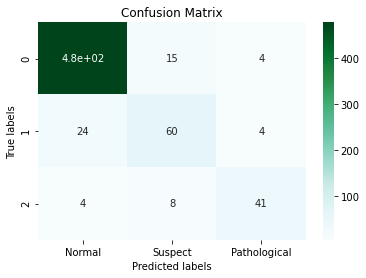

In [37]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_LR), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [38]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
print(f"K-Nearest Neighbors: {round(knn_model.score(X_test,y_test),3)}")
pred_knn = knn_model.predict(X_test)

K-Nearest Neighbors: 0.909


In [39]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95       497
           2       0.77      0.57      0.65        88
           3       0.93      0.79      0.86        53

    accuracy                           0.91       638
   macro avg       0.88      0.78      0.82       638
weighted avg       0.90      0.91      0.90       638



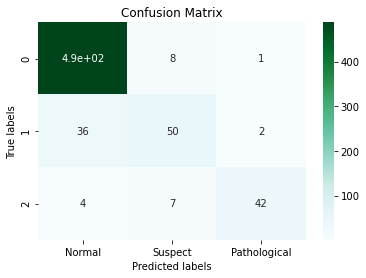

In [40]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [41]:
RF = RandomForestClassifier()
RF_model = RF.fit(X_train, y_train)
print(f"Random Forest Classifier: {round(RF_model.score(X_test,y_test),3)}")
pred_RF = RF_model.predict(X_test)

Random Forest Classifier: 0.942


In [42]:
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

           1       0.94      0.99      0.97       497
           2       0.91      0.66      0.76        88
           3       0.98      0.94      0.96        53

    accuracy                           0.94       638
   macro avg       0.94      0.86      0.90       638
weighted avg       0.94      0.94      0.94       638



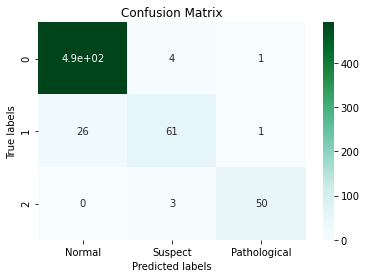

In [27]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_RF), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [43]:
GBC = GradientBoostingClassifier()
GBC_model = GBC.fit(X_train,y_train)
print(f"Gradient Boosting Classifier: {round(GBC_model.score(X_test,y_test),3)}")
pred_GBC = GBC_model.predict(X_test)

Gradient Boosting Classifier: 0.951


In [44]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97       497
           2       0.89      0.76      0.82        88
           3       0.96      0.98      0.97        53

    accuracy                           0.95       638
   macro avg       0.94      0.91      0.92       638
weighted avg       0.95      0.95      0.95       638



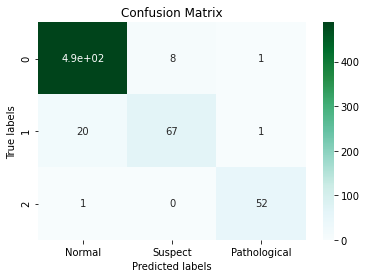

In [45]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_GBC), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [48]:
#Learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [20]:
results = pd.DataFrame({
                        "Model": ["Logistic Regression",
                                  "KNN",
                                  "Random Forest",
                                  "Gradient Boosting Classifier"],
                        "Score": [LR_model.score(X_train, y_train),
                                  knn_model.score(X_train, y_train),
                                  RF_model.score(X_train, y_train),
                                  GBC_model.score(X_train, y_train),
                                    ]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

,Model
Score,
0.998656,Random Forest
0.995968,Gradient Boosting Classifier
0.928763,KNN
0.900538,Logistic Regression
